### TPC Benchmarking  
Results Plotting  

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

import config

In [3]:
test = "TPC-DS"
scale_factor = "1"

In [4]:
fps = config.fp_results + config.sep + "auto_co_01"
fps

'/home/colin/code/bq_snowflake_benchmark/results/auto_co_01'

In [5]:
fps_results = glob.glob(fps + "/*_*_results*")

In [6]:
fps_time = glob.glob(fps + "/*_*_times*")

In [18]:
d = []
for fp in fps_time:
    df = pd.read_csv(fp, index_col=None, header=0)
    d.append(df)

df = pd.concat(d, axis=0, ignore_index=True)

In [19]:
fps[0]

'/'

In [20]:
if "query" in fps_time[0]:
    x_type = "query_n"
else:
    x_type = "stream_p"

In [30]:
x_type = "query_n"

In [21]:
df.dtypes

db           object
test         object
scale         int64
source       object
cid           int64
desc         object
query_n       int64
seq_id       object
driver_t0    object
driver_t1    object
qid          object
dtype: object

In [22]:
df.head()

,db,test,scale,source,cid,desc,query_n,seq_id,driver_t0,driver_t1,qid
0,bq,ds,1,ds_1GB_01,1,dev_test_02,83,t2,2020-05-15 18:08:41.642849+00:00,2020-05-15 18:08:44.811780+00:00,1a720dfc-5592-4bc1-a591-246b56ee508a
1,bq,ds,1,ds_1GB_01,1,dev_test_02,32,t2,2020-05-15 18:08:46.457610+00:00,2020-05-15 18:08:46.865178+00:00,92f4c096-78c3-412f-bc2b-951fd6bca754
2,bq,ds,1,ds_1GB_01,1,dev_test_02,30,t2,2020-05-15 18:08:49.008972+00:00,2020-05-15 18:08:49.315195+00:00,afa52701-f3cb-4676-81fb-e148d8c08334
3,bq,ds,1,ds_1GB_01,1,dev_test_02,92,t2,2020-05-15 18:08:51.182875+00:00,2020-05-15 18:08:51.686158+00:00,d4ce96e3-fc64-420b-82fc-f042f00f919b
4,bq,ds,1,ds_1GB_01,1,dev_test_02,66,t2,2020-05-15 18:08:53.009965+00:00,2020-05-15 18:08:53.619894+00:00,ee18c586-ff13-477e-a72b-5299b8348330


In [23]:
df = df.sort_values(by="source")

In [24]:
df["description"] = df.db + "_" + df.desc

In [26]:
df.driver_t0 = pd.to_datetime(df.driver_t0)
df.driver_t1 = pd.to_datetime(df.driver_t1)

df["dt"] = df.driver_t1 - df.driver_t0
df["dt_s"] = df.dt.dt.total_seconds()

In [27]:
df[df.db == "sf"].head()

,db,test,scale,source,cid,desc,query_n,seq_id,driver_t0,driver_t1,qid,description,dt,dt_s
123,sf,ds,1,ds_1GB_01,1,dev_test_02,8,t2,2020-05-15 18:06:20.664541+00:00,2020-05-15 18:06:21.362545+00:00,01943f5e-021a-dc0d-0009-c08300033776,sf_dev_test_02,00:00:00.698004,0.698004
124,sf,ds,1,ds_1GB_01,1,dev_test_02,14,t2,2020-05-15 18:06:22.031006+00:00,2020-05-15 18:06:27.603753+00:00,01943f5e-02cd-b3d7-0009-c0830003174e,sf_dev_test_02,00:00:05.572747,5.572747
125,sf,ds,1,ds_1GB_01,1,dev_test_02,50,t2,2020-05-15 18:06:28.256541+00:00,2020-05-15 18:06:30.490503+00:00,01943f5e-02b4-87d3-0009-c08300031752,sf_dev_test_02,00:00:02.233962,2.233962
126,sf,ds,1,ds_1GB_01,1,dev_test_02,52,t2,2020-05-15 18:06:30.885617+00:00,2020-05-15 18:06:31.282960+00:00,01943f5e-029a-8662-0009-c0830003377a,sf_dev_test_02,00:00:00.397343,0.397343
127,sf,ds,1,ds_1GB_01,1,dev_test_02,81,t2,2020-05-15 18:06:31.756302+00:00,2020-05-15 18:06:32.613990+00:00,01943f5e-0256-5621-0009-c0830003175e,sf_dev_test_02,00:00:00.857688,0.857688


In [28]:
df[df.db == "bq"].head()

,db,test,scale,source,cid,desc,query_n,seq_id,driver_t0,driver_t1,qid,description,dt,dt_s
0,bq,ds,1,ds_1GB_01,1,dev_test_02,83,t2,2020-05-15 18:08:41.642849+00:00,2020-05-15 18:08:44.811780+00:00,1a720dfc-5592-4bc1-a591-246b56ee508a,bq_dev_test_02,00:00:03.168931,3.168931
96,bq,ds,1,ds_1GB_01,1,dev_test_02,74,t2,2020-05-15 18:13:48.359162+00:00,2020-05-15 18:13:48.667098+00:00,76c41268-c32a-48db-b6f9-e085fa92ecd4,bq_dev_test_02,00:00:00.307936,0.307936
95,bq,ds,1,ds_1GB_01,1,dev_test_02,42,t2,2020-05-15 18:13:46.721235+00:00,2020-05-15 18:13:47.096762+00:00,aa813dc4-77a5-40e1-8384-f60e6a2465de,bq_dev_test_02,00:00:00.375527,0.375527
26,bq,ds,1,ds_1GB_01,1,dev_test_02,8,t2,2020-05-15 18:09:53.314500+00:00,2020-05-15 18:09:53.679164+00:00,9c5355aa-2e4d-42ef-ac2b-d5ef546182ba,bq_dev_test_02,00:00:00.364664,0.364664
27,bq,ds,1,ds_1GB_01,1,dev_test_02,14,t2,2020-05-15 18:09:55.308733+00:00,2020-05-15 18:09:55.674277+00:00,258206cb-0959-4b9f-9918-e299cf5c0f67,bq_dev_test_02,00:00:00.365544,0.365544


In [32]:
dfp_dt = df.pivot(index=x_type, columns="db", values="dt_s")
#dfp_bp = df.pivot(index=x_type, columns="db", values="bytes_processed")

In [33]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

### Plot Results

In [35]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [36]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=12)

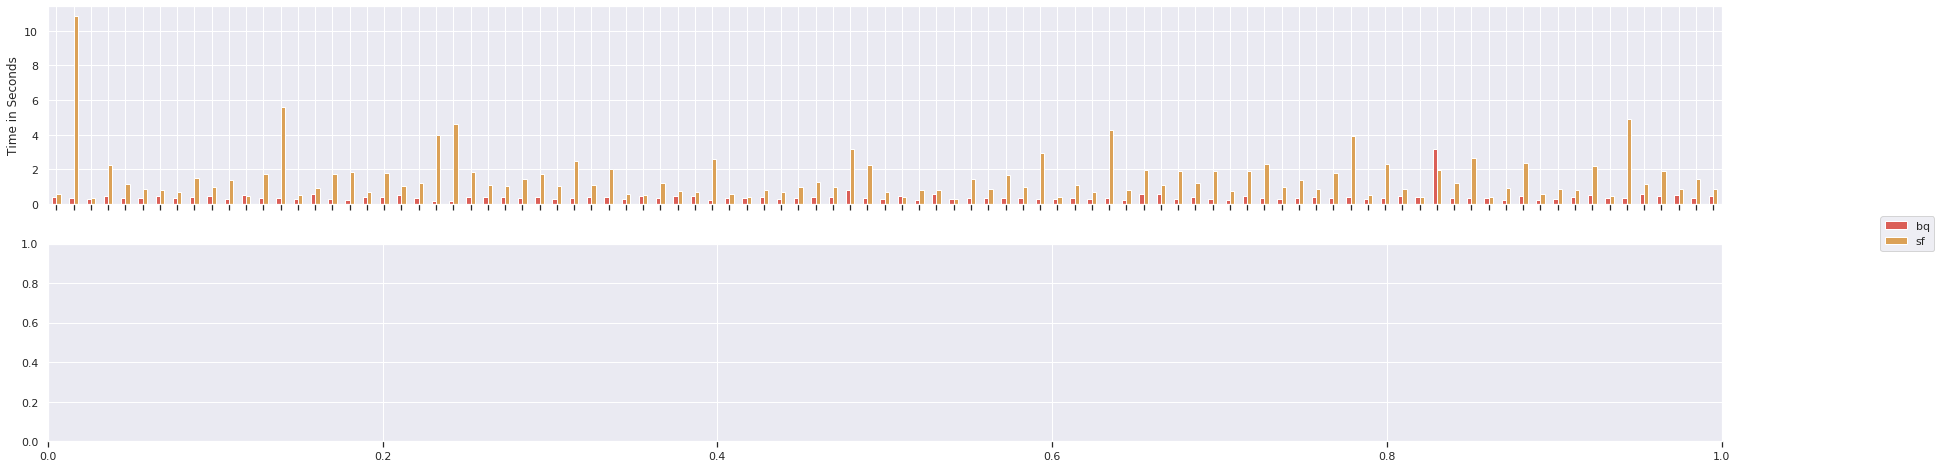

In [39]:
plot_name = "{}_{}GB_{}_comparison.png".format(test, scale_factor, x_type)

# invert bytes processed for plotting
#_dfp_bp = dfp_bp.copy() * -1
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=False, color=color_palette)
#ax2 = _dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(30, 8, forward=True)

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[])

#ax2.set_ylabel("TiB Processed")
#ax2.set_xlabel("Query Number")
#ticks =  ax2.get_yticks()
#ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
#ax2.set_yticklabels(ticks);
#ax2.xaxis.tick_top()

#plt.subplots_adjust(hspace=0.11)
#plt.subplots_adjust(right=0.79)

fig.legend(handles, labels, loc="right")
#fig.legend(handles, labels, loc="lower center")
plt.savefig(config.fp_plots + config.sep + plot_name, bbox_to_anchor='tight')
print();

In [21]:
dfp_dt.sum()

db
bq    56.206000
sf    28.677865
dtype: float64

In [22]:
dfp_bp.sum()

db
bq    3.759623e-03
sf   -2.000888e-11
dtype: float64

In [23]:
dfp_bp.sum() * 5

db
bq    1.879812e-02
sf   -1.000444e-10
dtype: float64